In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [42]:
df = pd.read_csv("clean_dataset.csv")

In [43]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [44]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [45]:
#drop month, day and year
df.drop(["day","month","year"], axis = 1 , inplace = True)

In [46]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [47]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [48]:
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1) #encoding


In [49]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1.0


In [50]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [51]:
#independent and dependet fetures
x = df.drop('Classes', axis = 1)
y = df['FWI']

In [52]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0


In [53]:
y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [54]:
# now we will do tran test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [55]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [56]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.590824,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.607985,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,0.007491,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.325202,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.709200,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.879341,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.742523,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.921125,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.857150,0.114897
FWI,0.590824,-0.607985,0.007491,-0.325202,0.709200,0.879341,0.742523,0.921125,0.857150,1.000000,0.229685


<Axes: >

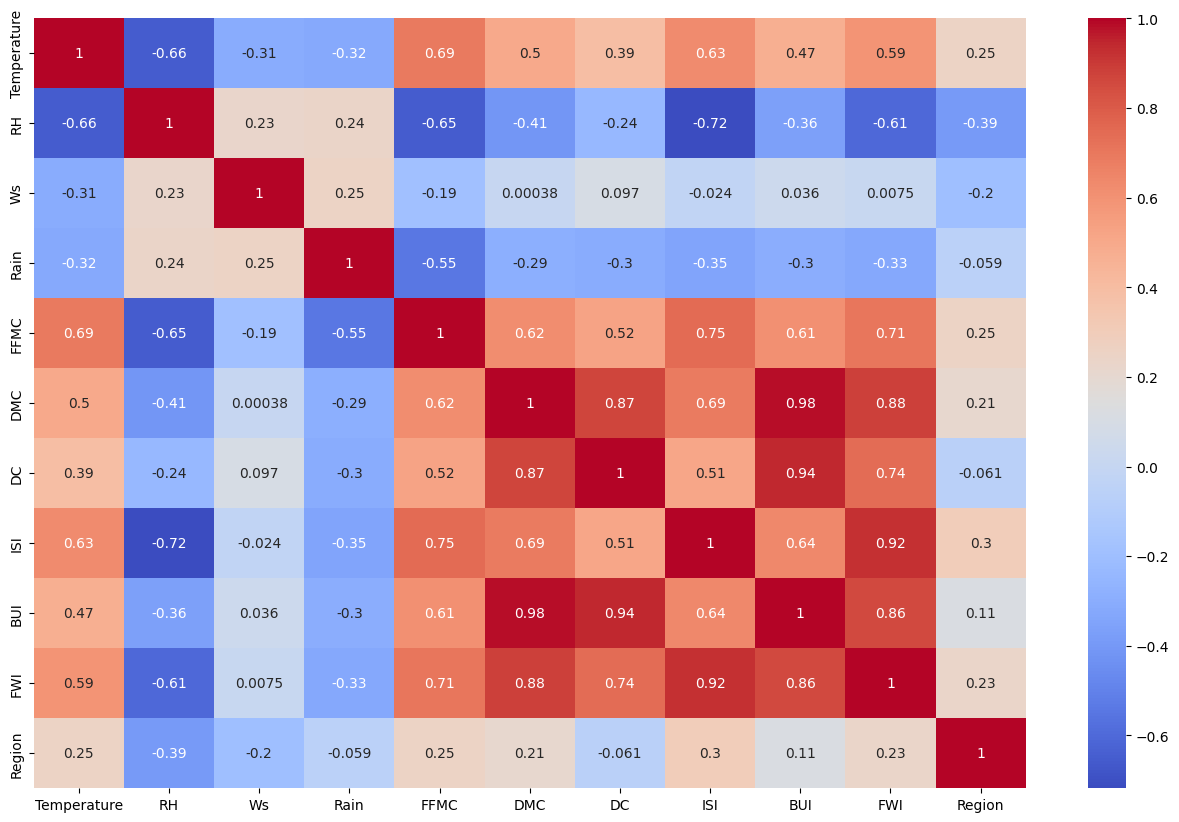

In [57]:
#check for multicollinerity

plt.figure(figsize = (16,10))
corr = x_train.corr()
sns.heatmap(x_train.corr(), annot = True, cmap = "coolwarm")

In [58]:
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold: # to handle -ve value i have written absolute
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [59]:
#threshold domain expertise
corr_features = correlation(x_train,0.7)

In [60]:
#checking correlation fetures
corr_features

{'BUI', 'DC', 'FWI', 'ISI'}

In [61]:
#drop fetures when correlation is more than 0.85
x_train.drop(corr_features, axis = 1, inplace = True)
x_test.drop(corr_features, axis = 1, inplace = True)
x_train.shape, x_test.shape


((182, 7), (61, 7))

#Feature Scaling Or Standarization

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [63]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.12805583,
        -0.88272888, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -1.21758569,
        -0.86687565,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  1.15703067,
         0.61540157,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -2.20933724,
        -1.06504105, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.73099656,
         0.37760309,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -1.33631651,
        -1.01748135, -0.98907071]])

#Box Plots To understand Effects Of Standard Scaler

Text(0.5, 1.0, 'x_train After Scaling')

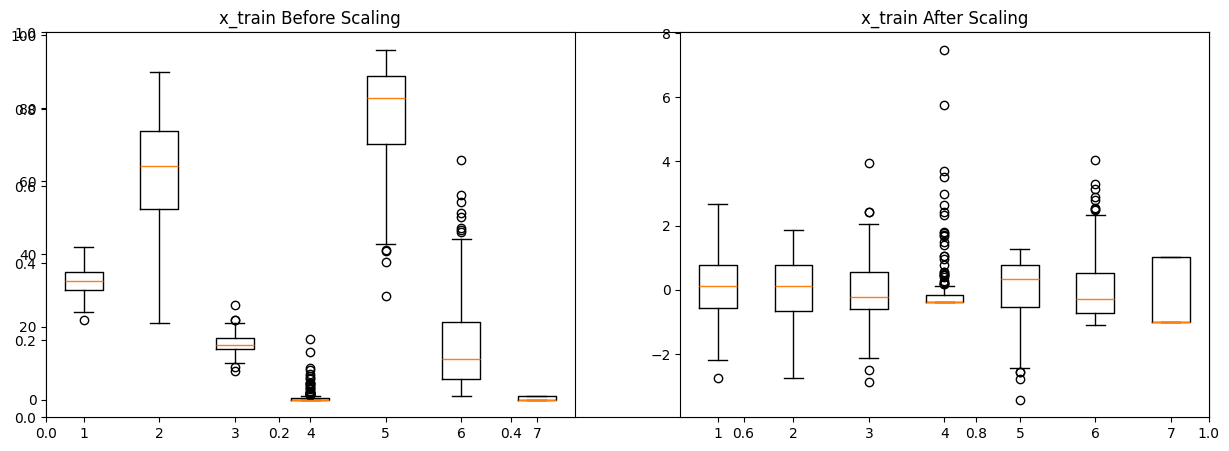

In [76]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(x = x_train.values)
plt.title("x_train Before Scaling")
plt.subplot(1,2,2)
plt.boxplot(x = x_train_scaled)
plt.title("x_train After Scaling")

#Applying Linear regression model


MAE: 2.2301202183547106
MSE: 8.931068775898794
RMSE: 2.9884893802553147
R2 Score: 0.7982160136811766


Text(0, 0.5, 'Predicted')

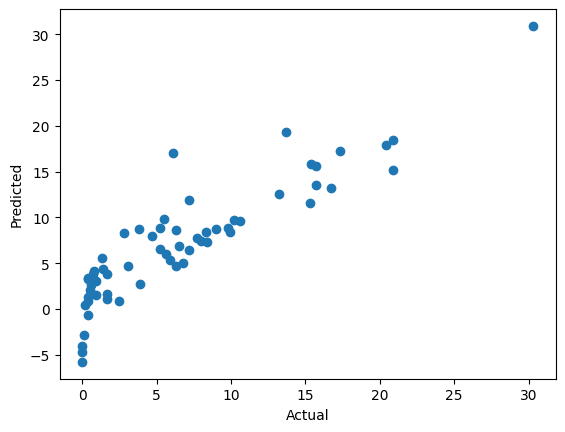

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

# LASSO REGRESSION

MAE: 2.4580026414262983
MSE: 9.966578659972301
RMSE: 3.1569888596528655
R2 Score: 0.7748202345729962


Text(0, 0.5, 'Predicted')

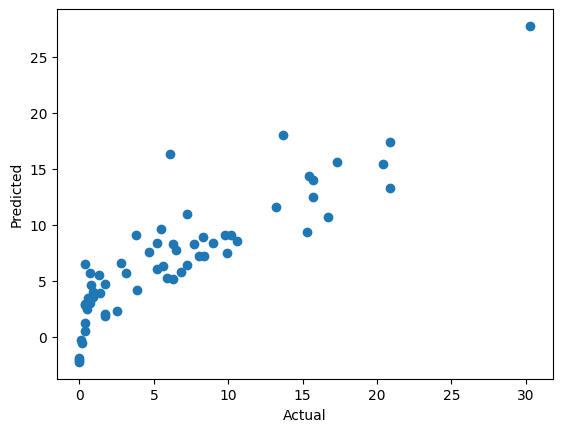

In [66]:
# next we are applying ridge and lasso
#It's particularly valued for feature selection and preventing overfitting.

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
lasso = Lasso()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
lasso.fit(x_train_scaled,y_train)
y_pred = lasso.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")


# CROSS VALIDATION LASSO


In [67]:
from sklearn.linear_model import LassoCV #cv is cross validation
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lasso_cv.fit(x_train_scaled,y_train)

LassoCV(cv=10, max_iter=100000)

In [68]:
lasso_cv.alpha_

np.float64(0.033536888874574025)

In [69]:
lasso_cv.alphas_

array([6.73834239, 6.28420067, 5.86066658, 5.46567726, 5.09730891,
       4.75376735, 4.43337934, 4.13458441, 3.85592726, 3.59605067,
       3.35368889, 3.12766148, 2.91686756, 2.72028045, 2.53694266,
       2.36596121, 2.20650334, 2.0577924 , 1.91910408, 1.78976289,
       1.66913886, 1.55664449, 1.45173186, 1.35388999, 1.26264234,
       1.17754447, 1.09818191, 1.02416813, 0.95514262, 0.89076921,
       0.83073434, 0.77474563, 0.72253037, 0.67383424, 0.62842007,
       0.58606666, 0.54656773, 0.50973089, 0.47537673, 0.44333793,
       0.41345844, 0.38559273, 0.35960507, 0.33536889, 0.31276615,
       0.29168676, 0.27202805, 0.25369427, 0.23659612, 0.22065033,
       0.20577924, 0.19191041, 0.17897629, 0.16691389, 0.15566445,
       0.14517319, 0.135389  , 0.12626423, 0.11775445, 0.10981819,
       0.10241681, 0.09551426, 0.08907692, 0.08307343, 0.07747456,
       0.07225304, 0.06738342, 0.06284201, 0.05860667, 0.05465677,
       0.05097309, 0.04753767, 0.04433379, 0.04134584, 0.03855

In [70]:
lasso_cv.mse_path_

array([[ 43.05559925,  59.56941078,  71.50869539,  63.24931873,
         49.12804662,  58.62978766, 114.63963567,  39.18749868,
         50.07626343,  37.59292229],
       [ 39.81872188,  53.7567869 ,  65.64267188,  58.52725137,
         44.3141743 ,  53.50568554, 114.63963567,  36.18035562,
         44.78825354,  32.40137906],
       [ 36.95555542,  48.66433412,  60.41091281,  51.86072469,
         40.09078106,  48.99692656, 114.55554601,  33.59374256,
         40.22381568,  28.01756865],
       [ 34.42065166,  44.20073834,  55.81255859,  46.06507097,
         36.38341859,  45.02687144, 101.29762033,  31.37094088,
         36.28635825,  24.32741843],
       [ 32.1742645 ,  40.28641145,  51.76834514,  41.0266862 ,
         33.12716961,  41.52862668,  89.82902147,  29.46275065,
         32.89202887,  21.2323113 ],
       [ 30.18162192,  36.85197533,  48.2091144 ,  36.64677499,
         30.26541759,  38.44379113,  79.91247764,  27.82650247,
         29.96804445,  18.64703229],
       [ 2

Text(0, 0.5, 'Predicted')

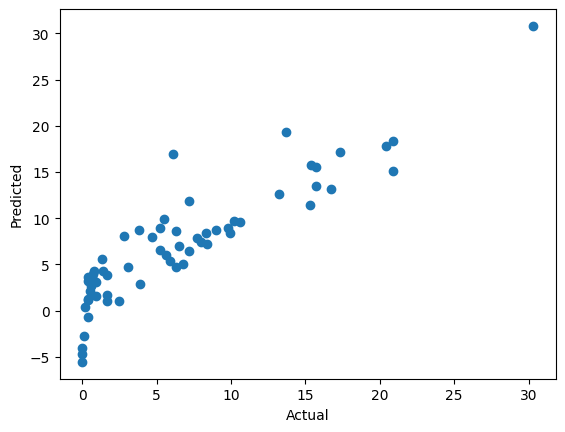

In [71]:
y_pred = lasso_cv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

#Ridge Regression Model

Mean absolute error 2.2284537007051735
Mean squared error 8.917366616730277
Root mean squared error 2.98619601110347
R2 score 0.7985255932362753


Text(0, 0.5, 'Predicted')

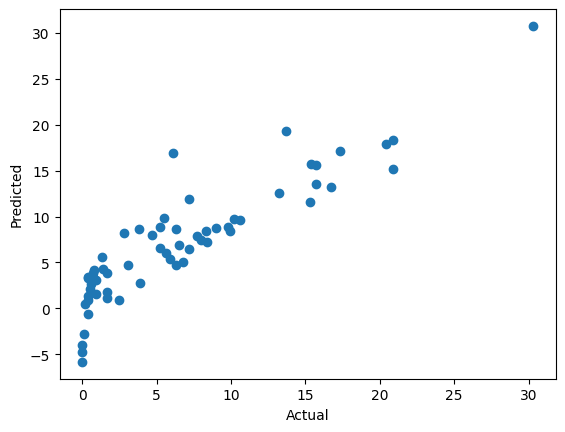

In [72]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
ridge = Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("Mean absolute error", mae)
print("Mean squared error", mse)
print("Root mean squared error", rmse)
print("R2 score", score)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

#checking cross validation

{'alpha_per_target': False,
 'alphas': array([7.16353484, 0.37930658, 9.9409999 , 8.31869533, 5.03459024,
        0.2591576 , 0.71800154, 7.98995683, 7.60858668, 8.39890853,
        8.38128429, 7.57018049, 1.44903176, 2.65322594, 2.85471253,
        8.86444615, 7.76500928, 4.79645981, 5.93412376, 0.3265346 ,
        5.96056939, 6.54583791, 8.182668  , 6.23286779, 7.31781588,
        4.86480262, 4.39800177, 1.3907953 , 9.1496203 , 3.02483167,
        1.68432578, 8.96561392, 8.03533003, 2.97794681, 5.43510821,
        8.14587007, 1.55646946, 0.63330522, 5.24833829, 2.0868151 ,
        3.29175673, 9.61845171, 0.57340387, 3.11924061, 1.36624258,
        0.89041077, 8.96389625, 2.95746207, 6.76286128, 9.5285429 ]),
 'cv': 10,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': 'neg_mean_absolute_error',
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

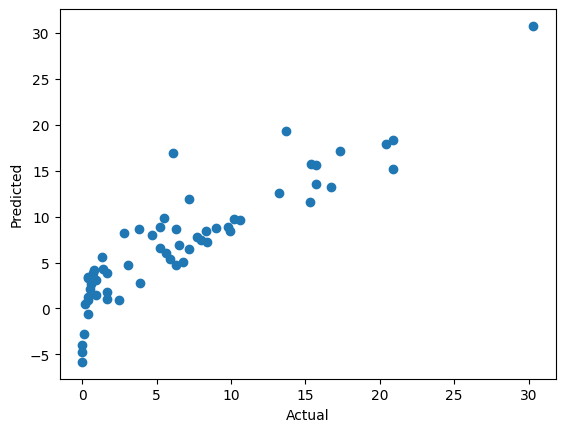

In [75]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = np.random.uniform(0,10,50), cv = 10, scoring = "neg_mean_absolute_error")
ridge_cv.fit(x_train_scaled,y_train)
y_pred = ridge_cv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
ridge_cv.get_params()

#ELASTICNET REGRESSION


MAE: 2.8281228552037088
MSE: 12.214269885597469
RMSE: 3.4948919705188985
R2 Score: 0.7240370520781503


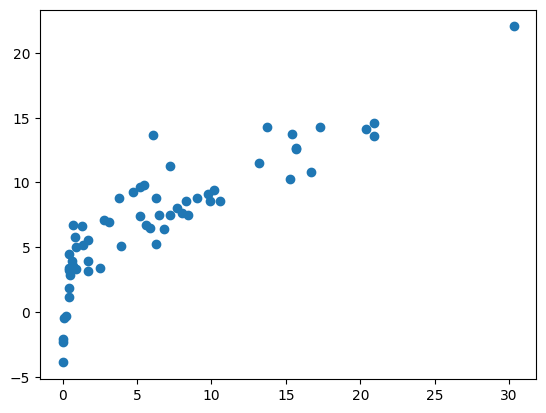

In [77]:
# elasticnet is combination of both ridge and lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
elasticnet = ElasticNet()
elasticnet.fit(x_train_scaled,y_train)
y_pred = elasticnet.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)

#cross validation on elasticnet

mean absolute error 2.23100524154919
mean squared error 8.908743819114509
root mean squared error 2.984751885687403
r2 score 0.798720412302144


Text(0, 0.5, 'Predicted')

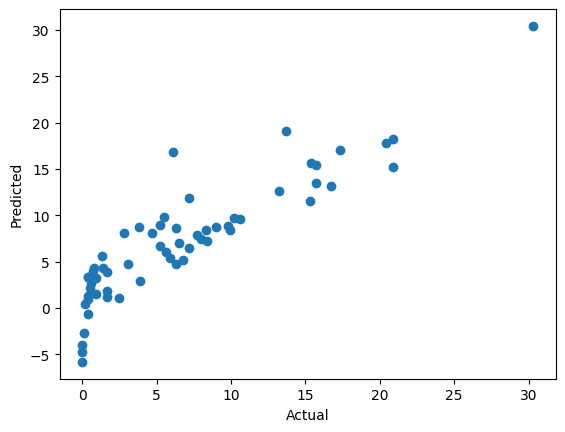

In [78]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(alphas = None, cv = 10)
elasticcv.fit(x_train_scaled,y_train)
y_pred = elasticcv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("mean squared error",mse)
print("root mean squared error",rmse)
print("r2 score",score)
plt.xlabel("Actual")
plt.ylabel("Predicted")


In [79]:
#now pickle the ml models
# preprocessing model standardsclaer
sc

StandardScaler()

In [80]:
ridge

Ridge()

In [82]:
import pickle as pk
pk.dump(sc,open("sc.pkl","wb"))
pk.dump(ridge,open("ridge.pkl","wb"))
